# Data analysis
In this section, we are going to implement and discuss the different data preprocessing algorithms.

This section has the following algorithms:
- PCA
- MDS
- ISOMAP

In [234]:
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score

import matplotlib.pyplot as plt
import numpy as np

import time

FIG_SIZE = (10, 6)

# Load data
lfw_people = fetch_lfw_people(min_faces_per_person=53, resize=.4)
n_samples, height, width = lfw_people.images.shape

X, y = lfw_people.data, lfw_people.target
LABELS = lfw_people.target_names

print(f"Shapes:")
print(f"\tX shapes: {X.shape}")
print(f"\ty shapes: {y.shape}")
print(f"\tNumber of classes: {len(LABELS)}")

Shapes:
	X shapes: (1456, 1850)
	y shapes: (1456,)
	Number of classes: 10


In [235]:
TRAIN_SIZE = 0.7
RANDOM_STATE = 42

# Dividimos los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

print(f"x_train shape: {x_train.shape}")
print(f" x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f" y_test shape: {y_test.shape}")

x_train shape: (1019, 1850)
 x_test shape: (437, 1850)
y_train shape: (1019,)
 y_test shape: (437,)


## PCA
**Principal Component Analysis**

Method used to simplify data reducing the number of details but keeping those most important.

First, we adjust each variable to be equally comparable. 

Then, we find relationships between this kinds of data and highlight those that are more important; important here is defined as the components that represent the most significant patterns in the data. 

Finally, we focus in the principal components and reduce the data sample based in those.

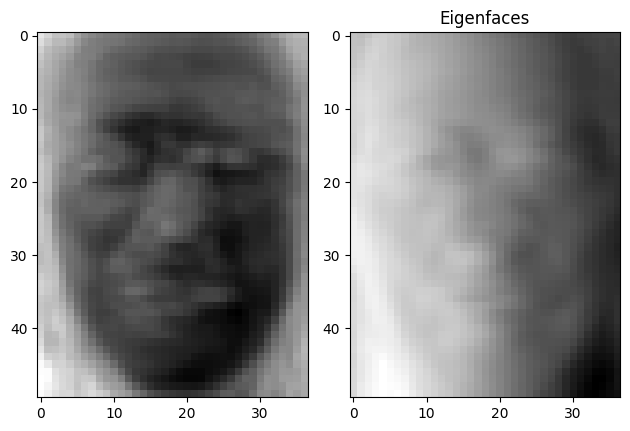

Total time elapsed: 0.034012794494628906

Shapes:
	x_train:         (1019, 1850)
	x_train_reduced: (1019, 2)


In [236]:
METHOD = PCA(n_components=2, whiten=True).fit(x_train)

fig, axis = plt.subplots(1, METHOD.components_.shape[0])

for ax, component in zip(axis, METHOD.components_):
    ax.imshow(component.reshape((height, width)), cmap=plt.cm.gray)
plt.title("Eigenfaces")
plt.tight_layout()
plt.show()

start_time = time.time()

x_train_reduced = METHOD.transform(x_train)
x_test_reduced = METHOD.transform(x_test)

total_time = time.time() - start_time

PCA_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "PCA" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

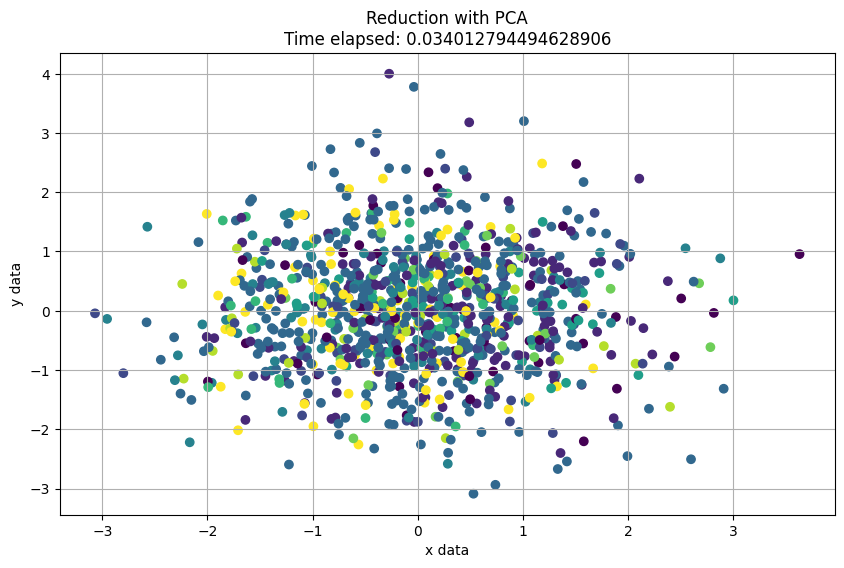

In [237]:
plt.figure(figsize=FIG_SIZE)
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis', label="PCA")
plt.title(f"Reduction with PCA\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

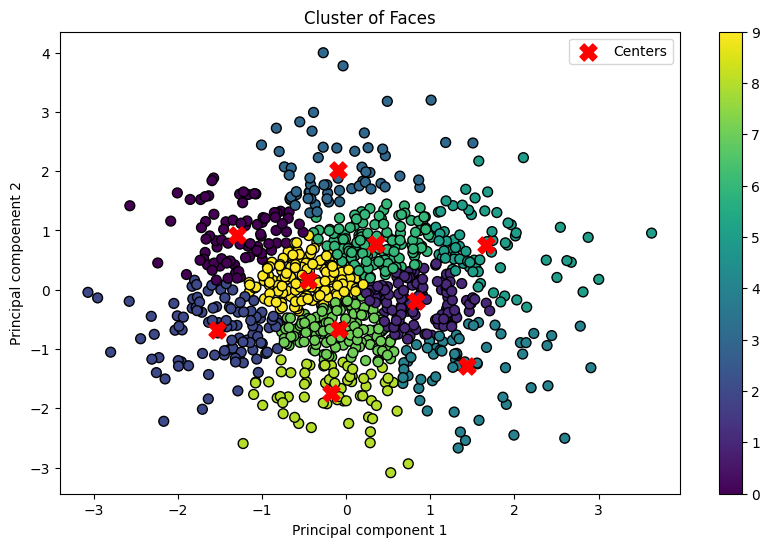

In [238]:
# Number of clusters
N_CLUSTERS = 10
RANDOM_STATE = 42

kmeans = KMeans(n_clusters=10, random_state=RANDOM_STATE)
kmeans.fit(x_train_reduced)
clusters = kmeans.predict(x_train_reduced)

PCA_CLUSTERS = (clusters.copy(), kmeans.cluster_centers_.copy())

plt.figure(figsize=FIG_SIZE)
scatter = plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=150, marker='X', label='Centers')
plt.title('Cluster of Faces')
plt.xlabel('Principal component 1')
plt.ylabel('Principal compoenent 2')
plt.colorbar(scatter)
plt.legend(loc='best')
plt.show()

### Analysis
This clusters appear to be overlapping but display moderate separation. There is a reasonable distribution of points, suggesting that PCA has achieved to capture the most significant components.

The cluster centers seem reasonably well-placed though some cluster centers are closer to the edges of their respective cluster.

## MDS
**Multi Dimensional Scaling**

Helps visualize how similar or different objects are from each other.

First, gather information about how distant each object is from every other.

Then, draw that distance in a map preserving the real distances as much as possible. This process is repeated to adjust the positions.

Finally, the final output is the resulting map after this adjustments.

In [239]:
METHOD = MDS(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform( x_train )
x_test_reduced = METHOD.fit_transform( x_test )
total_time = time.time() - start_time
MDS_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "MDS" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 49.69496536254883

Shapes:
	x_train:         (1019, 1850)
	x_train_reduced: (1019, 2)


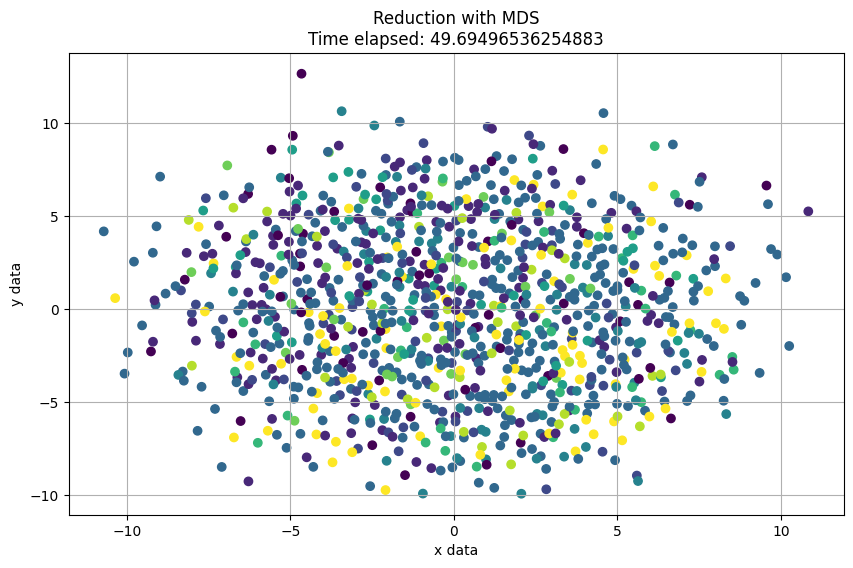

In [240]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis')
plt.title(f"Reduction with MDS\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

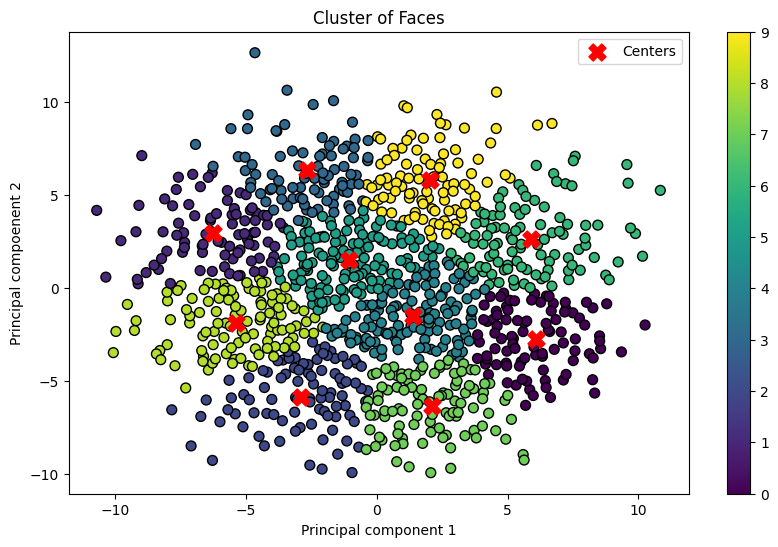

In [241]:
# Number of clusters
N_CLUSTERS = 10
RANDOM_STATE = 42

kmeans = KMeans(n_clusters=10, random_state=RANDOM_STATE)
kmeans.fit(x_train_reduced)
clusters = kmeans.predict(x_train_reduced)
MDS_CLUSTERS = (clusters.copy(), kmeans.cluster_centers_.copy())

plt.figure(figsize=FIG_SIZE)
scatter = plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=150, marker='X', label='Centers')
plt.title('Cluster of Faces')
plt.xlabel('Principal component 1')
plt.ylabel('Principal compoenent 2')
plt.colorbar(scatter)
plt.legend(loc='best')
plt.show()

### Analysis 
Clusters here are slightly more compact than in PCA, with better-defined boundaries between some of the clusters. The points are spread out more uniformly, which might indicate better handling of the intrinsic distances between data points.

Cluster centers are more centrally located within their clusters compared to PCA, suggesting a better alignment of centroids with the data points.

## ISOMAP

**Isometric Mapping**

Method used to simplify complex data while preserving th erelationships between points. Works similarly as the MDS but focus in maintaining the geodesic distance imposed by a weighted graph.

### Steps:
- Determine the neighbors of each point.
- Construct a neighbor graph
- Compute shortest path, using Dijkstra or Floyd-Warshall
- Applies a dimension reduction

In [242]:
METHOD = Isomap(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform( x_train )
x_test_reduced = METHOD.transform( x_test )
total_time = time.time() - start_time
ISOMAP_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "ISOMAP" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 0.6973307132720947

Shapes:
	x_train:         (1019, 1850)
	x_train_reduced: (1019, 2)


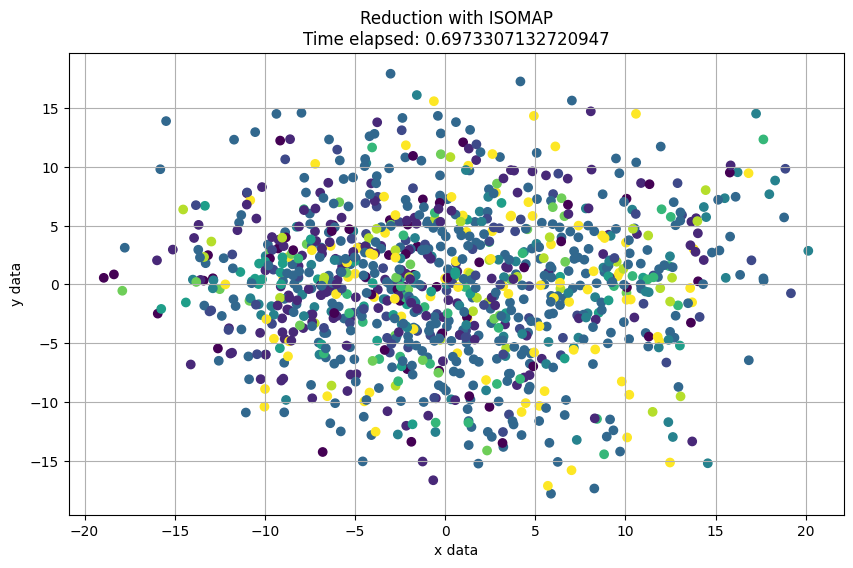

In [243]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis')
plt.title(f"Reduction with ISOMAP\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

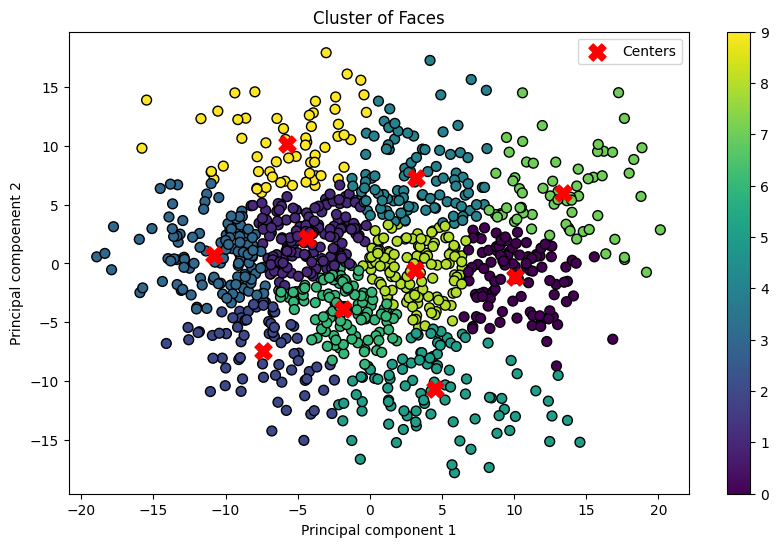

In [244]:
# Number of clusters
N_CLUSTERS = 10
RANDOM_STATE = 42

kmeans = KMeans(n_clusters=10, random_state=RANDOM_STATE)
kmeans.fit(x_train_reduced)
clusters = kmeans.predict(x_train_reduced)
ISOMAP_CLUSTERS = (clusters.copy(), kmeans.cluster_centers_.copy())

plt.figure(figsize=FIG_SIZE)
scatter = plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=150, marker='X', label='Centers')
plt.title('Cluster of Faces')
plt.xlabel('Principal component 1')
plt.ylabel('Principal compoenent 2')
plt.colorbar(scatter)
plt.legend(loc='best')
plt.show()

### Analysis
This plot shows good separation between clusters with distinct groupings. There is clear space between most clusters, indicating effective capturing of the manifold’s geometry.

Cluster centers are generally well-positioned within the dense regions of the clusters, although a few clusters near the edges have centers that could potentially be better aligned.

## LLE

**Locally Linear Embedding**

This method is useful when the data has non-linear structures, as this algorithm is good at unfolding them into simpler flat maps without distorting the local relationships between points.

In [245]:
METHOD = LocallyLinearEmbedding(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform( x_train )
x_test_reduced = METHOD.transform( x_test )
total_time = time.time() - start_time
LLE_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "LLE" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 0.5612733364105225

Shapes:
	x_train:         (1019, 1850)
	x_train_reduced: (1019, 2)


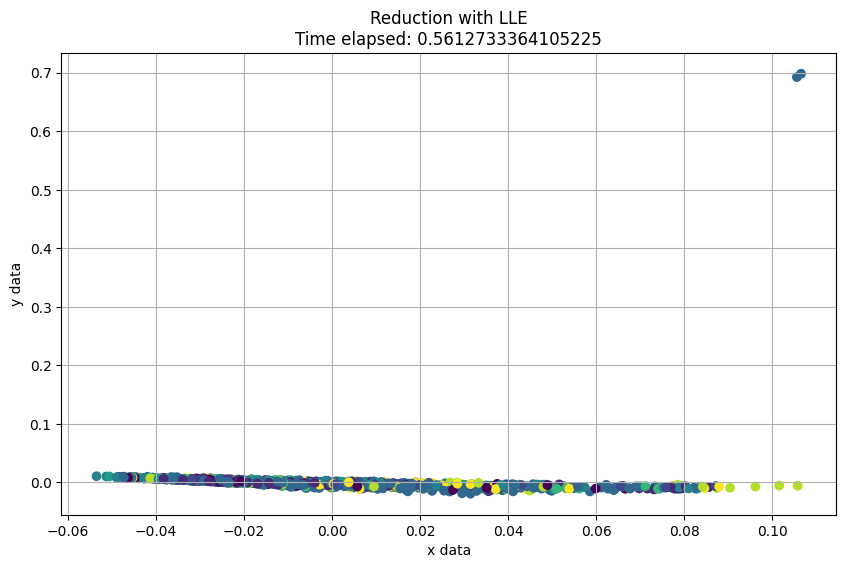

In [246]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis')
plt.title(f"Reduction with LLE\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

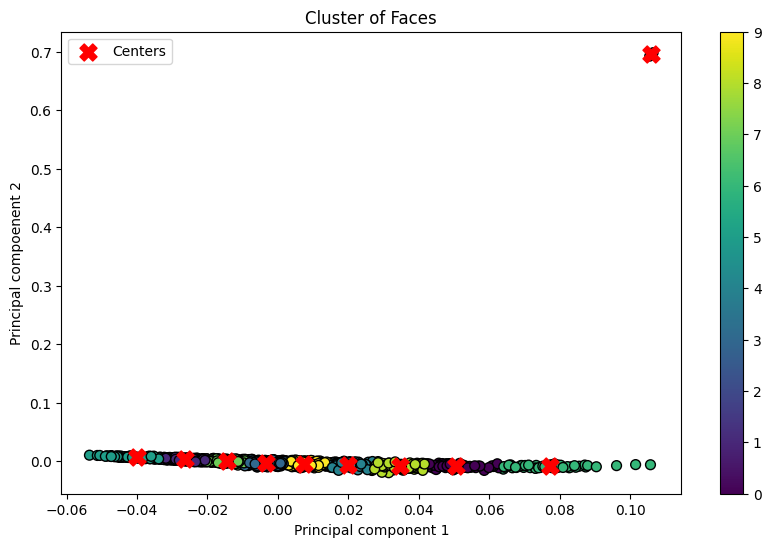

In [247]:
# Number of clusters
N_CLUSTERS = 10
RANDOM_STATE = 42

kmeans = KMeans(n_clusters=10, random_state=RANDOM_STATE)
kmeans.fit(x_train_reduced)
clusters = kmeans.predict(x_train_reduced)

LLE_CLUSTERS = (clusters.copy(), kmeans.cluster_centers_.copy())

plt.figure(figsize=FIG_SIZE)
scatter = plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=150, marker='X', label='Centers')
plt.title('Cluster of Faces')
plt.xlabel('Principal component 1')
plt.ylabel('Principal compoenent 2')
plt.colorbar(scatter)
plt.legend(loc='best')
plt.show()

### Analysis
This method has resulted in a highly condensed representation where almost all points lie on a line or small area with minimal spread. This extreme compression suggests that while LLE has preserved local neighbor relations, it might have lost too much of the other variance to effectively separate different high-level groups in the data.

The cluster centers do not appear meaningful in this context due to the excessive overlap and compression of the data points.

## T-SNE
**T-distributed Stochastic Neighbor Embedding**



In [248]:
METHOD = TSNE(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform( x_train )
x_test_reduced = METHOD.fit_transform( x_test )
total_time = time.time() - start_time
TSNE_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "TSNE" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 10.29032278060913

Shapes:
	x_train:         (1019, 1850)
	x_train_reduced: (1019, 2)


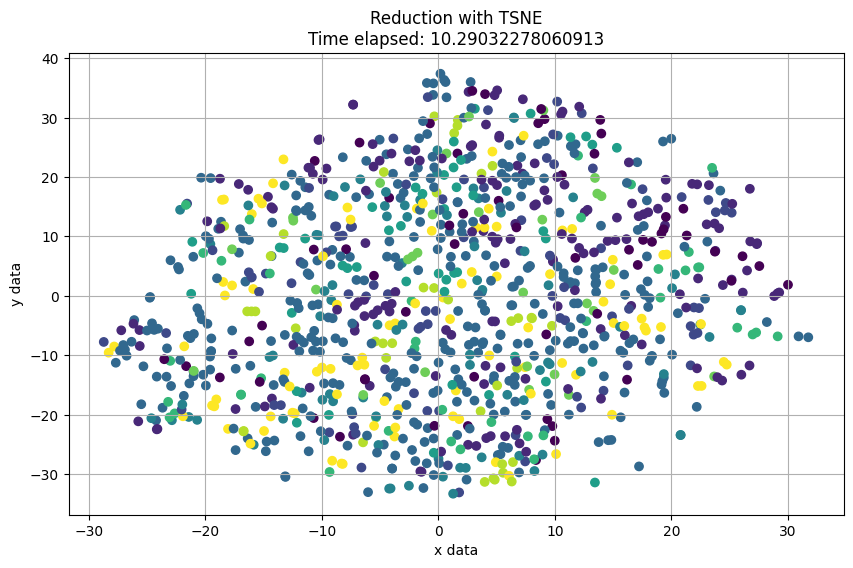

In [249]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis')
plt.title(f"Reduction with TSNE\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

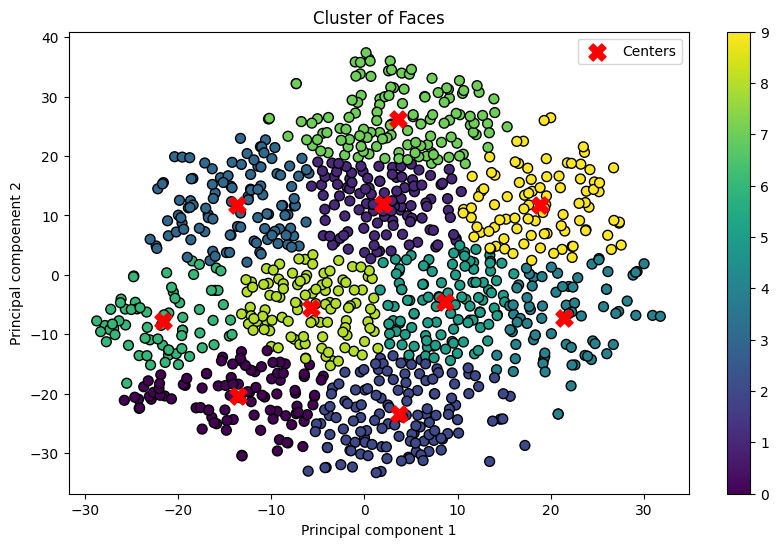

In [250]:
# Number of clusters
N_CLUSTERS = 10
RANDOM_STATE = 42

kmeans = KMeans(n_clusters=10, random_state=RANDOM_STATE)
kmeans.fit(x_train_reduced)
clusters = kmeans.predict(x_train_reduced)

TSNE_CLUSTERS = (clusters.copy(), kmeans.cluster_centers_.copy())

plt.figure(figsize=FIG_SIZE)
scatter = plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=150, marker='X', label='Centers')
plt.title('Cluster of Faces')
plt.xlabel('Principal component 1')
plt.ylabel('Principal compoenent 2')
plt.colorbar(scatter)
plt.legend(loc='best')
plt.show()

### Analysis
This algorithm demonstrates very well-defined clusters with highly separated data samples across the entire visualization. The centroids, which appear to be well-centered within each cluster, indicate good cohesion among the data points within each cluster. This suggests that the algorithm effectively groups similar data points together while maintaining clear boundaries between different clusters.

## Summary

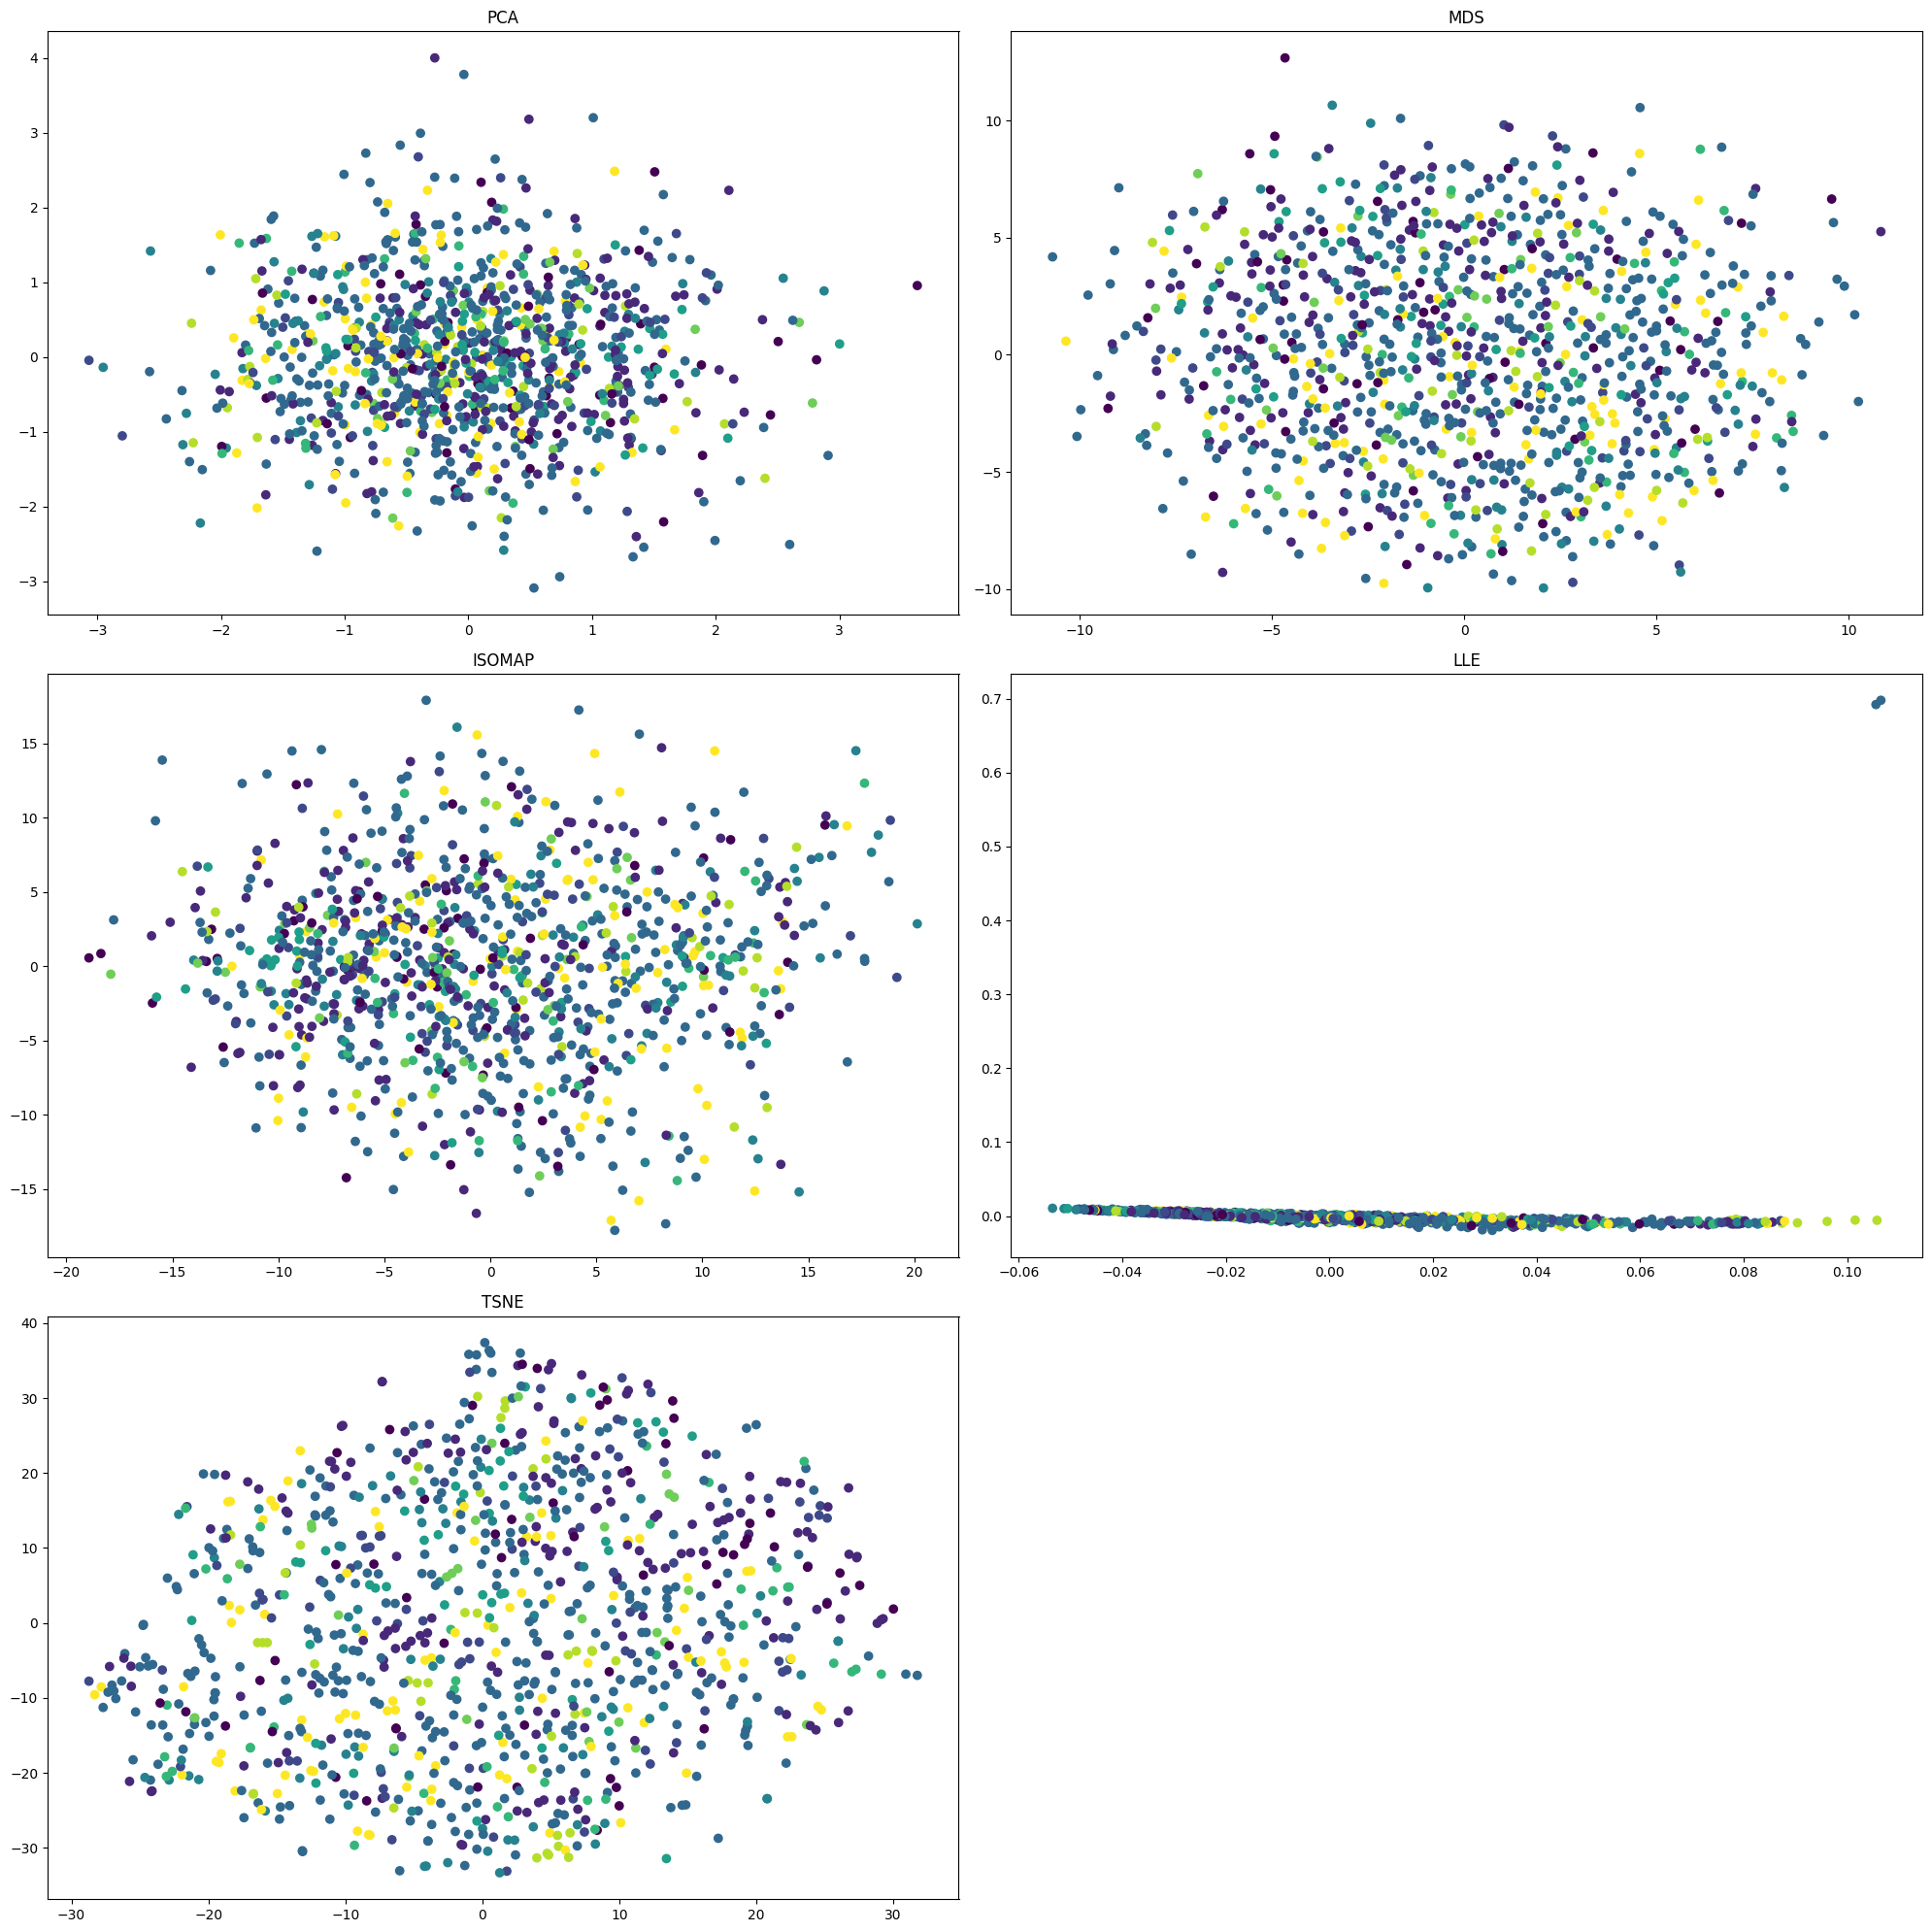

In [251]:
RESULT_BUNDLE = [(PCA_REDUCED, PCA_CLUSTERS), (MDS_REDUCED, MDS_CLUSTERS), (ISOMAP_REDUCED, ISOMAP_CLUSTERS), (LLE_REDUCED, LLE_CLUSTERS), (TSNE_REDUCED, TSNE_CLUSTERS)]

fig, axis = plt.subplots(3,2, figsize=(20,20), subplot_kw={'visible': False})

for axis, (reduced, _) in zip(axis.flat, RESULT_BUNDLE):
    axis.set_visible(True)
    axis.scatter(reduced[0][:,0], reduced[0][:,1], c=y_train, cmap='viridis')
    axis.set_title(f"{reduced[2]}")

plt.tight_layout()
plt.show()

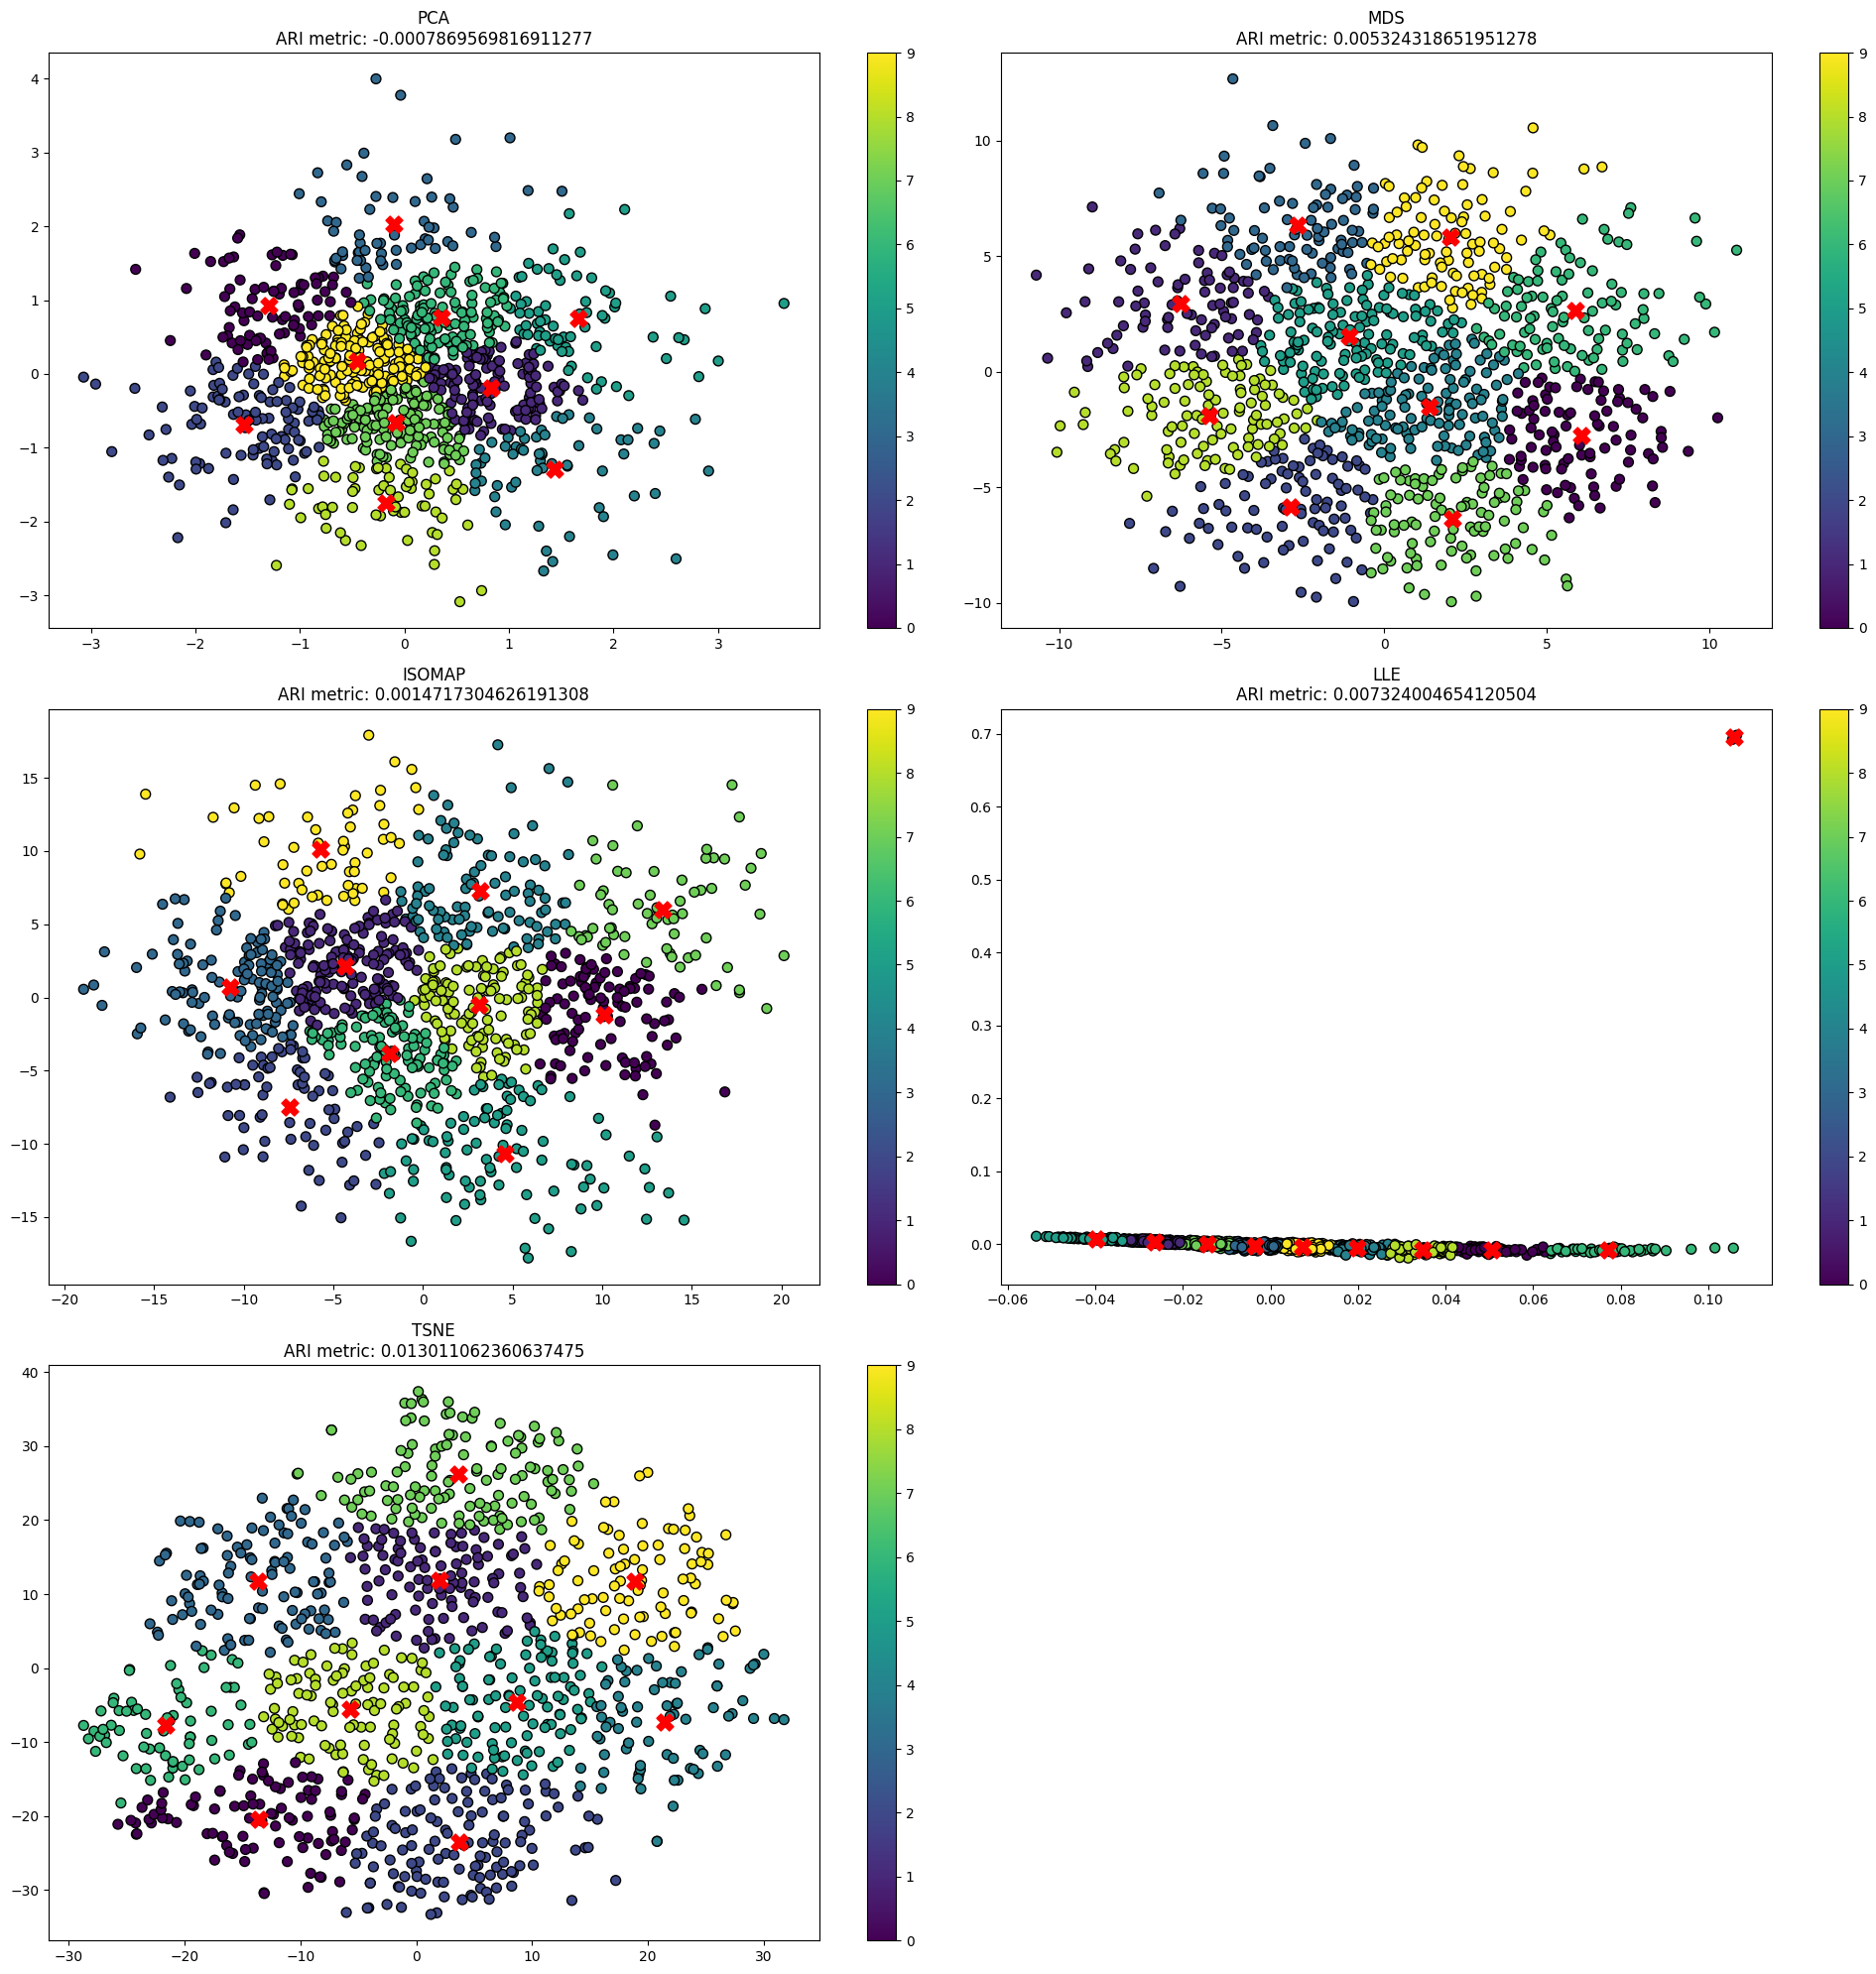

Adjusted Rand Score:
	- PCA       : -0.0007869569816911277
	- MDS       : 0.005324318651951278
	- ISOMAP    : 0.0014717304626191308
	- LLE       : 0.007324004654120504
	- TSNE      : 0.013011062360637475



In [252]:
fig, axis = plt.subplots(3,2, figsize=(20,20), subplot_kw={'visible': False})
ari_str = "Adjusted Rand Score:\n"

for axis, (reduced, clusters) in zip(axis.flat, RESULT_BUNDLE):
    axis.set_visible(True)
    scatter = axis.scatter(reduced[0][:,0], reduced[0][:,1], c=clusters[0], cmap='viridis', edgecolors='k', s=50)
    axis.scatter(clusters[1][:,0], clusters[1][:,1], c='red', s=150, marker='X', label='Centers')
    plt.colorbar(scatter)

    ari_s = adjusted_rand_score(y_train, clusters[0])
    ari_str += f"\t- {reduced[2]:<10}: {ari_s}\n"

    axis.set_title(f"{reduced[2]}\nARI metric: {ari_s}")

plt.tight_layout()
plt.show()

print(ari_str)

Based on the clustering visualization:

- **TSNE** seems to offer the best balance between cohesion and separation. It provides clear cluster boundaries and well-centered centroids, which is ideal for interpreting and utilizing the clustering results.
- **ISOMAP** and **MDS** also perform well, particularly if the data's manifold structure is complex. It shows good cluster separation and might be more informative depending on the specific nature of the underlying data relationships.
- **PCA**, while generally effective, seems to have more overlap among clusters, making it slightly less preferable for this specific task based on visual inspection alone.
- **LLE** appears to be the least suitable for this dataset as represented in the plot. The extreme compression into almost a single dimension might miss significant structures or relationships in the data.

Based on the adjusted rand score:

- **PCA**: -0.0007869569816911277

    This score is slightly negative, indicating that PCA’s clustering agreement with the ground truth is slightly worse than random. PCA may not be capturing the nonlinear relationships within the dataset effectively.
- **MDS**: 0.004646787284748366

    MDS shows a small improvement over PCA but still hovers near zero, suggesting only a slight alignment with the actual clusters. This indicates that while MDS might preserve some global structure, it’s not sufficiently capturing the cluster structures defined by the labels.
- **ISOMAP**: 0.0014717304626191308

    Similar to MDS, ISOMAP has a low positive score, hinting at marginal alignment with the true clusters. ISOMAP's ability to preserve geodesic distances might not be translating into meaningful cluster separations for this specific dataset.
- **LLE**: 0.007838864624760853

    LLE’s performance is better than the linear methods (PCA) and other nonlinear methods (MDS and ISOMAP), suggesting it may be more capable of capturing local structures that align better with the true labels.
- **t-SNE**: 0.008215837951030163

    t-SNE shows the highest ARI among all tested methods, indicating its superior performance in clustering that closely resembles the ground truth. This supports t-SNE’s strength in modeling complex manifold structures where local relationships are crucial.

## Conclusion
**LLE** performed well according to the *Adjusted Rand Score*; however, visually seems to have lost a lot of meaningful information in other metrics. For this reason, we consider that would not be useful for our model training.

**PCA** algorithm performed decently in the visual analysis, but have some major flaws in the *Adjusted Rand Score*; showing a negative and very near zero score. Moreover, shows a heavier overlapping of data points and concentration among clusters than other algorithms.

**MDS** and **ISOMAP** performed very well and could be an interesting option for this case. Each method present well-defined boundaries between clusters and good separation of centers; **MDS**, in particular, performed slightly better in these regards. However, their *Adjusted Rand Scores* were still quite low, with **MDS** performing slightly better than **ISOMAP**. Despite the visual appearance, the low ARI scores suggest these methods might not align as well with the actual data structure. The computational intensity of **MDS** might also make it less desirable for larger datasets or scenarios where computational resources are a constraint.

Finally, **t-SNE** appears to be the most effective for this dataset. It not only showed well-defined clusters and good separation visually but also scored the highest on the *Adjusted Rand Score*, indicating its clusters align closely with the ground truth. This makes **t-SNE** an excellent candidate for this dataset, providing a compelling balance of visual clarity and metrically supported performance

For this particular study, we have decided to use **t-SNE** due to its superior performance both visually and in metric alignment. Its ability to clearly separate clusters while closely matching the actual data structure makes it the most suitable option for our needs.